Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pubg_model_functions

Load Data

In [2]:
trainData = pd.read_csv('train_V2.csv')
testData = pd.read_csv('test_V2.csv')
print(trainData.shape, testData.shape)

(8999, 29) (7505, 28)


In [3]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               8999 non-null   object 
 1   groupId          8999 non-null   object 
 2   matchId          8999 non-null   object 
 3   assists          8999 non-null   int64  
 4   boosts           8999 non-null   int64  
 5   damageDealt      8999 non-null   float64
 6   DBNOs            8999 non-null   int64  
 7   headshotKills    8999 non-null   int64  
 8   heals            8999 non-null   int64  
 9   killPlace        8999 non-null   int64  
 10  killPoints       8999 non-null   int64  
 11  kills            8999 non-null   int64  
 12  killStreaks      8999 non-null   int64  
 13  longestKill      8999 non-null   float64
 14  matchDuration    8999 non-null   int64  
 15  matchType        8999 non-null   object 
 16  maxPlace         8999 non-null   int64  
 17  numGroups     

In [4]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7505 entries, 0 to 7504
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               7505 non-null   object 
 1   groupId          7505 non-null   object 
 2   matchId          7505 non-null   object 
 3   assists          7505 non-null   int64  
 4   boosts           7505 non-null   int64  
 5   damageDealt      7505 non-null   float64
 6   DBNOs            7505 non-null   int64  
 7   headshotKills    7505 non-null   int64  
 8   heals            7505 non-null   int64  
 9   killPlace        7505 non-null   int64  
 10  killPoints       7505 non-null   int64  
 11  kills            7505 non-null   int64  
 12  killStreaks      7505 non-null   int64  
 13  longestKill      7505 non-null   float64
 14  matchDuration    7505 non-null   int64  
 15  matchType        7505 non-null   object 
 16  maxPlace         7505 non-null   int64  
 17  numGroups     

In [5]:
trainData.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,8999.0,0.228470,0.573190,0.0,0.0,0.0000,0.0000,6.0
boosts,8999.0,1.129459,1.759368,0.0,0.0,0.0000,2.0000,11.0
damageDealt,8999.0,130.226078,170.845571,0.0,0.0,80.3400,183.6500,2325.0
DBNOs,8999.0,0.651961,1.132574,0.0,0.0,0.0000,1.0000,13.0
headshotKills,8999.0,0.226136,0.582475,0.0,0.0,0.0000,0.0000,8.0
heals,8999.0,1.375042,2.666197,0.0,0.0,0.0000,2.0000,29.0
killPlace,8999.0,47.900878,27.482678,1.0,24.0,48.0000,72.0000,100.0
killPoints,8999.0,507.422380,627.486182,0.0,0.0,0.0000,1172.0000,2026.0
kills,8999.0,0.922102,1.551745,0.0,0.0,0.0000,1.0000,21.0
killStreaks,8999.0,0.539504,0.713577,0.0,0.0,0.0000,1.0000,5.0


In [6]:
print(trainData.columns)
print(testData.columns)

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')
Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints'],
      dtype='object')


In [7]:
# Merge all data together to ahve better data set
pubgData = pd.concat([trainData, testData], axis =0)
print(pubgData.shape)
pubgData.head()

(16504, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [8]:
pubgData.info()
#none of the input has Null data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16504 entries, 0 to 7504
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               16504 non-null  object 
 1   groupId          16504 non-null  object 
 2   matchId          16504 non-null  object 
 3   assists          16504 non-null  int64  
 4   boosts           16504 non-null  int64  
 5   damageDealt      16504 non-null  float64
 6   DBNOs            16504 non-null  int64  
 7   headshotKills    16504 non-null  int64  
 8   heals            16504 non-null  int64  
 9   killPlace        16504 non-null  int64  
 10  killPoints       16504 non-null  int64  
 11  kills            16504 non-null  int64  
 12  killStreaks      16504 non-null  int64  
 13  longestKill      16504 non-null  float64
 14  matchDuration    16504 non-null  int64  
 15  matchType        16504 non-null  object 
 16  maxPlace         16504 non-null  int64  
 17  numGroups    

In [9]:
pubgData.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,16504.0,0.228975,0.571904,0.0,0.000,0.0000,0.00000,10.0
boosts,16504.0,1.124939,1.748059,0.0,0.000,0.0000,2.00000,13.0
damageDealt,16504.0,131.352608,170.177824,0.0,0.000,82.6200,186.42500,2325.0
DBNOs,16504.0,0.663112,1.147407,0.0,0.000,0.0000,1.00000,13.0
headshotKills,16504.0,0.231338,0.604110,0.0,0.000,0.0000,0.00000,12.0
heals,16504.0,1.391784,2.704147,0.0,0.000,0.0000,2.00000,32.0
killPlace,16504.0,47.657416,27.556983,1.0,24.000,47.0000,71.00000,100.0
killPoints,16504.0,509.873425,628.601707,0.0,0.000,0.0000,1178.00000,2033.0
kills,16504.0,0.933047,1.550793,0.0,0.000,0.0000,1.00000,21.0
killStreaks,16504.0,0.546352,0.716346,0.0,0.000,0.0000,1.00000,9.0


In [10]:
# Drop any null values if any
# dropna
pubgData.dropna(inplace=True)

nullCount = pubgData.isnull().sum().sort_values()
print('Null count : ', nullCount[nullCount > 0])


Null count :  Series([], dtype: int64)


Feature Engineering

In [11]:
# Create new features 
# for example total distance travelled includes walking, driving, swimming
# total health including boost and assist from others
pubgData['totalDistance'] = pubgData['rideDistance'] + pubgData['walkDistance'] + pubgData['swimDistance']
pubgData['healthItems'] = pubgData['heals'] + pubgData['boosts']
pubgData['headshotKillRate'] = pubgData['headshotKills'] / pubgData['kills']
pubgData['killPlaceOverMaxPlace'] = pubgData['killPlace'] / pubgData['maxPlace']
pubgData['killsOverWalkDistance'] = pubgData['kills'] / pubgData['walkDistance']

# fill missing or Inf data with 0
#fillInf(pubgData, 0)

In [12]:
# Rank as percentage
match = pubgData.groupby('matchId')
pubgData['killsPerc'] = match['kills'].rank(pct=True).values
pubgData['killPlacePerc'] = match['killPlace'].rank(pct=True).values
pubgData['walkDistancePerc'] = match['walkDistance'].rank(pct=True).values
pubgData['walkPerc_killsPerc'] = pubgData['walkDistancePerc'] / pubgData['killsPerc']


In [13]:
pubgData.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'totalDistance',
       'healthItems', 'headshotKillRate', 'killPlaceOverMaxPlace',
       'killsOverWalkDistance', 'killsPerc', 'killPlacePerc',
       'walkDistancePerc', 'walkPerc_killsPerc'],
      dtype='object')

In [14]:
# Drop Features which are irrrelevant
pubgData = pubgData.drop(['boosts', 'heals', 'revives', 'assists', 'headshotKills'], axis = 1)
pubgData = pubgData.drop(['roadKills', 'teamKills', 'rideDistance', 'walkDistance', 'swimDistance'], axis = 1)
pubgData = pubgData.drop(['Id', 'matchDuration', 'longestKill', 'rankPoints', 'killPoints', 'vehicleDestroys'], axis = 1)

In [15]:
pubgData.columns

Index(['groupId', 'matchId', 'damageDealt', 'DBNOs', 'killPlace', 'kills',
       'killStreaks', 'matchType', 'maxPlace', 'numGroups', 'weaponsAcquired',
       'winPoints', 'winPlacePerc', 'totalDistance', 'healthItems',
       'headshotKillRate', 'killPlaceOverMaxPlace', 'killsOverWalkDistance',
       'killsPerc', 'killPlacePerc', 'walkDistancePerc', 'walkPerc_killsPerc'],
      dtype='object')

In [16]:
pubgData.head()

,groupId,matchId,damageDealt,DBNOs,killPlace,kills,killStreaks,matchType,maxPlace,numGroups,...,winPlacePerc,totalDistance,healthItems,headshotKillRate,killPlaceOverMaxPlace,killsOverWalkDistance,killsPerc,killPlacePerc,walkDistancePerc,walkPerc_killsPerc
0,4d4b580de459be,a10357fd1a4a91,0.00,0,60,0,0,squad-fpp,28,26,...,0.4444,244.8000,0,NaN,2.142857,0.000000,1.0,1.0,1.000000,1.000000
1,684d5656442f9e,aeb375fc57110c,91.47,0,57,0,0,squad-fpp,26,25,...,0.6400,1445.0445,0,NaN,2.192308,0.000000,0.5,1.0,1.000000,2.000000
2,6a4a42c3245a74,110163d8bb94ae,68.00,0,47,0,0,duo,50,47,...,0.7755,161.8000,0,NaN,0.940000,0.000000,1.0,1.0,1.000000,1.000000
3,a930a9c79cd721,f1f1f4ef412d7e,32.90,0,75,0,0,squad-fpp,31,30,...,0.1667,202.7000,0,NaN,2.419355,0.000000,0.5,1.0,0.333333,0.666667
4,de04010b3458dd,6dc8ff871e21e6,100.00,0,45,1,1,solo-fpp,97,95,...,0.1875,49.7500,0,0.0,0.463918,0.020101,1.0,1.0,1.000000,1.000000


In [17]:
# Group all data type into one
# groupData = pubgData.groupby(['matchId','groupId','matchType'])

In [18]:
# Drop any feaure which has constant values across all data points as it will not add any 
# significance to model
constant_column = [col for col in pubgData.columns if pubgData[col].nunique() == 1]
print('drop columns:', constant_column)
pubgData.drop(constant_column, axis=1, inplace=True)

drop columns: []


In [19]:
pubgData.head()

,groupId,matchId,damageDealt,DBNOs,killPlace,kills,killStreaks,matchType,maxPlace,numGroups,...,winPlacePerc,totalDistance,healthItems,headshotKillRate,killPlaceOverMaxPlace,killsOverWalkDistance,killsPerc,killPlacePerc,walkDistancePerc,walkPerc_killsPerc
0,4d4b580de459be,a10357fd1a4a91,0.00,0,60,0,0,squad-fpp,28,26,...,0.4444,244.8000,0,NaN,2.142857,0.000000,1.0,1.0,1.000000,1.000000
1,684d5656442f9e,aeb375fc57110c,91.47,0,57,0,0,squad-fpp,26,25,...,0.6400,1445.0445,0,NaN,2.192308,0.000000,0.5,1.0,1.000000,2.000000
2,6a4a42c3245a74,110163d8bb94ae,68.00,0,47,0,0,duo,50,47,...,0.7755,161.8000,0,NaN,0.940000,0.000000,1.0,1.0,1.000000,1.000000
3,a930a9c79cd721,f1f1f4ef412d7e,32.90,0,75,0,0,squad-fpp,31,30,...,0.1667,202.7000,0,NaN,2.419355,0.000000,0.5,1.0,0.333333,0.666667
4,de04010b3458dd,6dc8ff871e21e6,100.00,0,45,1,1,solo-fpp,97,95,...,0.1875,49.7500,0,0.0,0.463918,0.020101,1.0,1.0,1.000000,1.000000


In [20]:
# We have several match type 
# for example solo, duo, squad
# Do one hot encoding for categorical variables
# Encode simialr label for match type into one.
# Example of mapping is below
'''
solo  <-- solo,solo-fpp,normal-solo,normal-solo-fpp
duo   <-- duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp
squad <-- squad,squad-fpp,normal-squad,normal-squad-fpp
'''
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('squad' in x) else 'squad'
pubgData['matchType'] = pubgData['matchType'].apply(mapper)
pubgData.head()

,groupId,matchId,damageDealt,DBNOs,killPlace,kills,killStreaks,matchType,maxPlace,numGroups,...,winPlacePerc,totalDistance,healthItems,headshotKillRate,killPlaceOverMaxPlace,killsOverWalkDistance,killsPerc,killPlacePerc,walkDistancePerc,walkPerc_killsPerc
0,4d4b580de459be,a10357fd1a4a91,0.00,0,60,0,0,duo,28,26,...,0.4444,244.8000,0,NaN,2.142857,0.000000,1.0,1.0,1.000000,1.000000
1,684d5656442f9e,aeb375fc57110c,91.47,0,57,0,0,duo,26,25,...,0.6400,1445.0445,0,NaN,2.192308,0.000000,0.5,1.0,1.000000,2.000000
2,6a4a42c3245a74,110163d8bb94ae,68.00,0,47,0,0,duo,50,47,...,0.7755,161.8000,0,NaN,0.940000,0.000000,1.0,1.0,1.000000,1.000000
3,a930a9c79cd721,f1f1f4ef412d7e,32.90,0,75,0,0,duo,31,30,...,0.1667,202.7000,0,NaN,2.419355,0.000000,0.5,1.0,0.333333,0.666667
4,de04010b3458dd,6dc8ff871e21e6,100.00,0,45,1,1,solo,97,95,...,0.1875,49.7500,0,0.0,0.463918,0.020101,1.0,1.0,1.000000,1.000000


In [21]:
pubgData.columns

Index(['groupId', 'matchId', 'damageDealt', 'DBNOs', 'killPlace', 'kills',
       'killStreaks', 'matchType', 'maxPlace', 'numGroups', 'weaponsAcquired',
       'winPoints', 'winPlacePerc', 'totalDistance', 'healthItems',
       'headshotKillRate', 'killPlaceOverMaxPlace', 'killsOverWalkDistance',
       'killsPerc', 'killPlacePerc', 'walkDistancePerc', 'walkPerc_killsPerc'],
      dtype='object')

In [22]:
categoricalDummies = pd.get_dummies(pubgData['matchType'], prefix='matchType') # This can be done by OneHotEncoder class from sklearn as well
pubgData = pd.concat([pubgData, categoricalDummies], axis = 1)
pubgData.head()

,groupId,matchId,damageDealt,DBNOs,killPlace,kills,killStreaks,matchType,maxPlace,numGroups,...,headshotKillRate,killPlaceOverMaxPlace,killsOverWalkDistance,killsPerc,killPlacePerc,walkDistancePerc,walkPerc_killsPerc,matchType_duo,matchType_solo,matchType_squad
0,4d4b580de459be,a10357fd1a4a91,0.00,0,60,0,0,duo,28,26,...,NaN,2.142857,0.000000,1.0,1.0,1.000000,1.000000,1,0,0
1,684d5656442f9e,aeb375fc57110c,91.47,0,57,0,0,duo,26,25,...,NaN,2.192308,0.000000,0.5,1.0,1.000000,2.000000,1,0,0
2,6a4a42c3245a74,110163d8bb94ae,68.00,0,47,0,0,duo,50,47,...,NaN,0.940000,0.000000,1.0,1.0,1.000000,1.000000,1,0,0
3,a930a9c79cd721,f1f1f4ef412d7e,32.90,0,75,0,0,duo,31,30,...,NaN,2.419355,0.000000,0.5,1.0,0.333333,0.666667,1,0,0
4,de04010b3458dd,6dc8ff871e21e6,100.00,0,45,1,1,solo,97,95,...,0.0,0.463918,0.020101,1.0,1.0,1.000000,1.000000,0,1,0


In [23]:
pubgData.columns

Index(['groupId', 'matchId', 'damageDealt', 'DBNOs', 'killPlace', 'kills',
       'killStreaks', 'matchType', 'maxPlace', 'numGroups', 'weaponsAcquired',
       'winPoints', 'winPlacePerc', 'totalDistance', 'healthItems',
       'headshotKillRate', 'killPlaceOverMaxPlace', 'killsOverWalkDistance',
       'killsPerc', 'killPlacePerc', 'walkDistancePerc', 'walkPerc_killsPerc',
       'matchType_duo', 'matchType_solo', 'matchType_squad'],
      dtype='object')

In [24]:
# drop matchId,groupId
pubgData.drop(['matchId','groupId', 'matchType'], axis=1, inplace=True)

In [25]:
pubgData.columns

Index(['damageDealt', 'DBNOs', 'killPlace', 'kills', 'killStreaks', 'maxPlace',
       'numGroups', 'weaponsAcquired', 'winPoints', 'winPlacePerc',
       'totalDistance', 'healthItems', 'headshotKillRate',
       'killPlaceOverMaxPlace', 'killsOverWalkDistance', 'killsPerc',
       'killPlacePerc', 'walkDistancePerc', 'walkPerc_killsPerc',
       'matchType_duo', 'matchType_solo', 'matchType_squad'],
      dtype='object')

In [26]:
pubgData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 0 to 8998
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   damageDealt            8999 non-null   float64
 1   DBNOs                  8999 non-null   int64  
 2   killPlace              8999 non-null   int64  
 3   kills                  8999 non-null   int64  
 4   killStreaks            8999 non-null   int64  
 5   maxPlace               8999 non-null   int64  
 6   numGroups              8999 non-null   int64  
 7   weaponsAcquired        8999 non-null   int64  
 8   winPoints              8999 non-null   int64  
 9   winPlacePerc           8999 non-null   float64
 10  totalDistance          8999 non-null   float64
 11  healthItems            8999 non-null   int64  
 12  headshotKillRate       3829 non-null   float64
 13  killPlaceOverMaxPlace  8999 non-null   float64
 14  killsOverWalkDistance  8805 non-null   float64
 15  kill

Train and test data

In [27]:
# Remove the entries tending towards infinite value or out of float range
pubgData = pubg_model_functions.clean_dataset(pubgData)

In [28]:
from sklearn.model_selection import train_test_split
X = pubgData.drop(['winPlacePerc'], axis=1)
y = pubgData['winPlacePerc']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25)
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [29]:
print(type(X_train), type(y_train), type(X_test), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [30]:
X_train

,damageDealt,DBNOs,killPlace,kills,killStreaks,maxPlace,numGroups,weaponsAcquired,winPoints,totalDistance,...,headshotKillRate,killPlaceOverMaxPlace,killsOverWalkDistance,killsPerc,killPlacePerc,walkDistancePerc,walkPerc_killsPerc,matchType_duo,matchType_solo,matchType_squad
8404,292.3,2.0,6.0,3.0,1.0,28.0,28.0,4.0,0.0,1987.54,...,0.333333,0.214286,0.001574,1.00,1.0,1.0,1.000000,1.0,0.0,0.0
7734,471.0,2.0,3.0,5.0,2.0,30.0,29.0,2.0,1500.0,357.10,...,0.400000,0.100000,0.014002,1.00,1.0,1.0,1.000000,1.0,0.0,0.0
7993,200.0,2.0,15.0,2.0,1.0,29.0,27.0,3.0,0.0,170.60,...,0.000000,0.517241,0.011723,1.00,1.0,1.0,1.000000,1.0,0.0,0.0
7591,235.7,2.0,23.0,2.0,2.0,49.0,47.0,3.0,1455.0,799.50,...,0.000000,0.469388,0.002502,0.75,0.5,1.0,1.333333,1.0,0.0,0.0
5202,503.7,5.0,3.0,5.0,1.0,29.0,27.0,4.0,0.0,3432.00,...,0.600000,0.103448,0.001457,1.00,1.0,1.0,1.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,567.1,3.0,6.0,4.0,1.0,30.0,29.0,8.0,1499.0,4757.80,...,0.500000,0.200000,0.000927,1.00,1.0,1.0,1.000000,1.0,0.0,0.0
5983,256.6,1.0,25.0,1.0,1.0,28.0,27.0,3.0,0.0,3451.84,...,0.000000,0.892857,0.000294,1.00,1.0,1.0,1.000000,1.0,0.0,0.0
1947,306.7,1.0,7.0,3.0,1.0,26.0,26.0,7.0,0.0,6593.00,...,0.000000,0.269231,0.001150,1.00,1.0,1.0,1.000000,1.0,0.0,0.0
7835,103.7,1.0,19.0,2.0,2.0,26.0,26.0,3.0,1531.0,1004.00,...,0.000000,0.730769,0.001992,1.00,1.0,1.0,1.000000,1.0,0.0,0.0


Apply Normalisation

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(type(X_train))
print(type(y_train))

(2870, 21)
(957, 21)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


Build ANN using Sequential and Layers class

In [33]:
X_train

array([[ 0.18938768,  0.46806055, -1.2183441 , ...,  0.45931521,
        -0.45820237, -0.02640739],
       [ 1.08279404,  0.46806055, -1.46043833, ...,  0.45931521,
        -0.45820237, -0.02640739],
       [-0.27206395,  0.46806055, -0.49206143, ...,  0.45931521,
        -0.45820237, -0.02640739],
       ...,
       [ 0.26138014, -0.25029976, -1.13764603, ...,  0.45931521,
        -0.45820237, -0.02640739],
       [-0.75351348, -0.25029976, -0.16926913, ...,  0.45931521,
        -0.45820237, -0.02640739],
       [-0.00459198,  1.18642085, -0.57275951, ...,  0.45931521,
        -0.45820237, -0.02640739]])

In [34]:
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10, verbose=0):
    """ Wrapper function to create a LearningRateScheduler with step decay schedule. """

    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch / step_size))

    return LearningRateScheduler(schedule, verbose)
    
lr_sched = step_decay_schedule(initial_lr=0.001, decay_factor=0.97, step_size=1, verbose=1)
lr_sched

In [35]:
early_stopping = pubg_model_functions.EarlyStopping(monitor='val_mean_absolute_error', mode='min', patience=10, verbose=1)
early_stopping

In [36]:
# Convert N-d array to 2-d array as it creates matrix multiplication issue in Sequentail layers
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

In [37]:
print(X_train.shape)
print(X_test.shape)

(2870, 21)
(957, 21)


In [38]:
type(X_train.shape[1])

int

In [39]:
np.random.seed(42)
tf.random.set_seed(1234)
dim = X_train.shape[1]
model = pubg_model_functions.createModel(dim)

In [40]:
history = model.fit(
        X_train, y_train,
        epochs=200,
        batch_size=2**15,
        validation_split=0.2,
        callbacks=[lr_sched, early_stopping],
        verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/200


1/1 - 14s - loss: 0.0989 - mae: 0.2646 - val_loss: 0.0879 - val_mae: 0.2473 - lr: 0.0010 - 14s/epoch - 14s/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0009699999999999999.
Epoch 2/200
1/1 - 1s - loss: 0.0593 - mae: 0.2005 - val_loss: 0.0706 - val_mae: 0.2197 - lr: 9.7000e-04 - 570ms/epoch - 570ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0009408999999999999.
Epoch 3/200
1/1 - 0s - loss: 0.0456 - mae: 0.1707 - val_loss: 0.0627 - val_mae: 0.2056 - lr: 9.4090e-04 - 480ms/epoch - 480ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.000912673.
Epoch 4/200
1/1 - 0s - loss: 0.0396 - mae: 0.1565 - val_loss: 0.0591 - val_mae: 0.1987 - lr: 9.1267e-04 - 413ms/epoch - 413ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.00088529281.
Epoch 5/200
1/1 - 0s - loss: 0.0363 - mae: 0.1485 - val_loss: 0.0585 - val_mae: 0.1973 - lr: 8.8529e-04 - 354ms/epo

Predict results

In [43]:
y_pred = model.predict(X_test)

print(X_test.shape)
print(y_pred.shape)


30/30 [==============================] - 0s 8ms/step
(957, 21)
(957, 1)


In [44]:
type(history)
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])


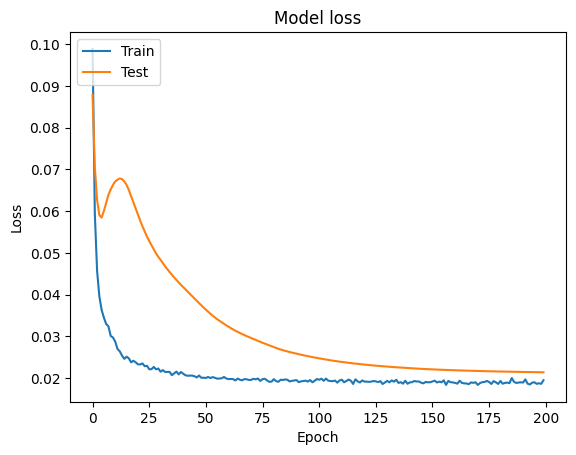

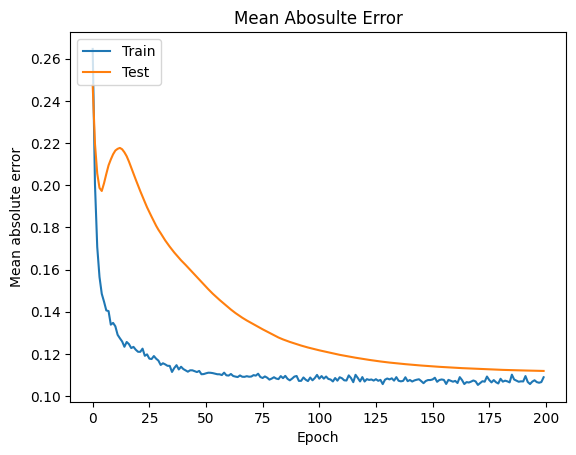

In [45]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation mae values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean Abosulte Error')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [46]:
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

Accuracy

In [47]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_test, y_pred)
r2Score

0.6890529629000524